### How to train a simple neural network for the MNIST dataset (digit classification)

In [35]:
from keras import models
from keras import layers
import numpy as np

In [9]:
# Define a dense (fully connected) layer than takes an input of 15 features and outputs 32 units
layer1 = layers.Dense(32, input_shape=(15,))

In [5]:
# A network defined with Sequential

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))


In [6]:
# The same model using the functional API

input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [10]:
# IMDB dataset

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

In [17]:
# Integers of train sample #100
print train_data[100]

# Classification of train sample #100
print train_labels[100]


[1, 13, 244, 6, 87, 337, 7, 628, 2, 5, 28, 285, 15, 240, 93, 23, 288, 549, 18, 2, 673, 4, 241, 534, 2, 2, 20, 38, 54, 13, 258, 46, 44, 14, 13, 2, 2, 12, 5, 5, 51, 9, 14, 45, 6, 762, 7, 2, 2, 328, 5, 428, 2, 15, 26, 2, 5, 2, 2, 5, 2, 279, 13, 92, 124, 803, 52, 21, 279, 14, 9, 43, 6, 762, 7, 595, 15, 16, 2, 23, 4, 2, 467, 4, 403, 7, 628, 2, 8, 97, 6, 171, 2, 99, 387, 72, 97, 12, 788, 15, 13, 161, 459, 44, 4, 2, 2, 173, 21, 69, 8, 401, 2, 4, 481, 88, 61, 2, 238, 28, 32, 11, 32, 14, 9, 6, 545, 2, 766, 5, 203, 73, 28, 43, 77, 317, 11, 4, 2, 953, 270, 17, 6, 2, 13, 545, 386, 25, 92, 2, 129, 278, 23, 14, 241, 46, 7, 158]
0


In [18]:
# How to decode the words lists
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 27s 16us/step


In [38]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[100]])

In [39]:
# The words in data sample 10
print decoded_review

? i am a great fan of david ? and have everything that he's made on dvd except for ? room the 2 hour ? ? movie so when i found out about this i ? ? it and and what is this it's a bunch of ? ? black and white ? that are ? and ? ? and ? maybe i don't know what's good but maybe this is just a bunch of crap that was ? on the ? under the name of david ? to make a few ? too let me make it clear that i didn't care about the ? ? part but had to keep ? the sound because my ? might have all in all this is a highly ? release and may well have just been left in the ? box set as a ? i highly recommend you don't ? your money on this 2 out of 10


In [44]:
def vectorize_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [48]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [46]:
print train_data[100]

[1, 13, 244, 6, 87, 337, 7, 628, 2, 5, 28, 285, 15, 240, 93, 23, 288, 549, 18, 2, 673, 4, 241, 534, 2, 2, 20, 38, 54, 13, 258, 46, 44, 14, 13, 2, 2, 12, 5, 5, 51, 9, 14, 45, 6, 762, 7, 2, 2, 328, 5, 428, 2, 15, 26, 2, 5, 2, 2, 5, 2, 279, 13, 92, 124, 803, 52, 21, 279, 14, 9, 43, 6, 762, 7, 595, 15, 16, 2, 23, 4, 2, 467, 4, 403, 7, 628, 2, 8, 97, 6, 171, 2, 99, 387, 72, 97, 12, 788, 15, 13, 161, 459, 44, 4, 2, 2, 173, 21, 69, 8, 401, 2, 4, 481, 88, 61, 2, 238, 28, 32, 11, 32, 14, 9, 6, 545, 2, 766, 5, 203, 73, 28, 43, 77, 317, 11, 4, 2, 953, 270, 17, 6, 2, 13, 545, 386, 25, 92, 2, 129, 278, 23, 14, 241, 46, 7, 158]


In [47]:
print x_train[100]

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

In [51]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]

y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [65]:

history = model.fit(partial_x_train, partial_y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 0s 15us/step - loss: 0.0716 - acc: 0.9787 - val_loss: 0.6711 - val_acc: 0.8334
Epoch 2/50
20000/20000 [==============================] - 0s 14us/step - loss: 0.0650 - acc: 0.9832 - val_loss: 0.7443 - val_acc: 0.8298
Epoch 3/50
20000/20000 [==============================] - 0s 15us/step - loss: 0.0651 - acc: 0.9810 - val_loss: 0.6984 - val_acc: 0.8220
Epoch 4/50
20000/20000 [==============================] - 0s 15us/step - loss: 0.0585 - acc: 0.9849 - val_loss: 0.7043 - val_acc: 0.8328
Epoch 5/50
20000/20000 [==============================] - 0s 15us/step - loss: 0.0571 - acc: 0.9858 - val_loss: 0.7013 - val_acc: 0.8312
Epoch 6/50
20000/20000 [==============================] - 0s 15us/step - loss: 0.0568 - acc: 0.9849 - val_loss: 0.7246 - val_acc: 0.8276
Epoch 7/50
20000/20000 [==============================] - 0s 16us/step - loss: 0.0581 - acc: 0.9840 - val_loss: 0.7303 - val_acc:

In [66]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

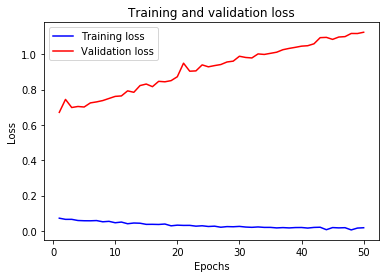

In [67]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()




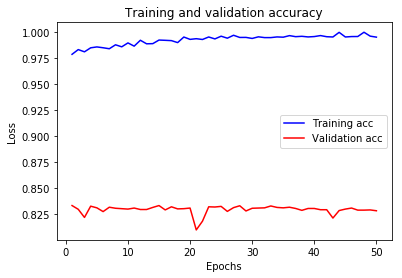

In [69]:
plt.clf()
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [70]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 26us/step - loss: 0.5612 - acc: 0.7244
Epoch 2/4
25000/25000 [==============================] - 0s 15us/step - loss: 0.3844 - acc: 0.8444
Epoch 3/4
25000/25000 [==============================] - 0s 15us/step - loss: 0.3347 - acc: 0.8635
Epoch 4/4
25000/25000 [==============================] - 1s 47us/step


In [71]:
print results

[0.32838202759742735, 0.86272]


In [72]:
model.predict(x_test)

array([[0.36576694],
       [0.98961806],
       [0.46336436],
       ...,
       [0.0672411 ],
       [0.07479736],
       [0.33314312]], dtype=float32)